<a href="https://colab.research.google.com/github/FrancoiseArtignan/VDB_jupyter/blob/refit_2021_student/TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Objectifs
##### 1 Lire et traiter des données d'entrée avec [PANDAS](https://pandas.pydata.org/)

##### 2 Représenter la distribution empirique des "fold-change" (**FC**) vs Précision, aka: volcano-plot
    
##### 3 Effectuer une analyse de sur-représentation en termes GO


## Ressources : Rappels et illustration de l'analyse de représentation de termes GO
###### [TP de MADP](https://github.com/glaunay/tp-proteomics#3-obtention-des-param%C3%A8tres-du-mod%C3%A8le)
###### [Fiche Bioconductor](https://www.bioconductor.org/help/course-materials/2015/SeattleApr2015/E_GeneSetEnrichment.html)



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Préparation de  l'environnement

##### Please `pip install -r requirements.txt` first

##### Directory Configuration

* `workDir` points to the Git project, holds the *tsv* file
* `libDir` points to Git project subdirectory hosting python library with files names `go.py  stat_utils.py  uniprot.py`
* `dataDir` points to the data folder with uniprot and GO files

In [2]:
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.6 MB 2.1 MB/s 


In [3]:
!pip install pyproteinsExt==1.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48 kB 1.3 MB/s 
  Created wheel for pyproteinsExt: filename=pyproteinsExt-1.5-py3-none-any.whl size=49533 sha256=1fe2b68c2ea9ca887af1c6f3c61b82294f5a239f8b7cccf5e28ccd731647eec2
  Stored in directory: /root/.cache/pip/wheels/78/ff/24/7e0185700b975bda741abe545cb486ea6ca3422a39ce5ca50a
Successfully built pyproteinsExt


In [4]:
!pip install owlready2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.5 MB 1.8 MB/s 
  Created wheel for owlready2: filename=Owlready2-0.39-cp37-cp37m-linux_x86_64.whl size=22132069 sha256=8cea8eb27bd16ddc82e494653cde0082cb537121c9fb0346da61913709ee7a40
  Stored in directory: /root/.cache/pip/wheels/c9/5b/fc/da1e42a17f22cd62bfb170f847a3fb541a7f628858ad3595ec
Successfully built owlready2


In [5]:
!pip install pyproteins==1.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pyproteins: filename=pyproteins-1.5-py3-none-any.whl size=29836 sha256=c25651b58472f6febe38f87ef4272afe045997f37ad7c262b1ff6a39612b9dbd
  Stored in directory: /root/.cache/pip/wheels/9f/39/3e/fbb597204438248386e256fc4d7a09b88512dfc5bdbce2cb19
Successfully built pyproteins
  Attempting uninstall: pyproteins
    Found existing installation: pyproteins 1.5.1
    Uninstalling pyproteins-1.5.1:
      Successfully uninstalled pyproteins-1.5.1


In [16]:
import sys, os
workDir = f"{os.getcwd()}/.."
libDir = f"{workDir}/content/drive/MyDrive/M2-2022-2023/VDB/VDB_jupyter/lib"
dataDir= f"{workDir}/content/drive/MyDrive/M2-2022-2023/VDB/VDB_jupyter/data" 

sys.path.append(libDir)

In [7]:
%load_ext autoreload
%autoreload 2

In [8]:
import pandas as pd
import numpy as np

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

## Jeux de données
* Jeux de données de protéomique quantitative au format TSV
* Ontologie GO au format [owl](http://www.obofoundry.org/ontology/go.html)
* Entrées Uniprot au format XML
    * Protéines de l'étude
    * Protéome d'E.Coli complet
    
<hr style="border:1px solid gray"> </hr>

### Lecture des valeurs experimentales
Charger ```TCL_wt1.tsv``` dans une [dataframe pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html).
<br/><span style="color:firebrick;font-weight:bold"> $\rhd$ 
Retirer les lignes présentant des aberrations numériques
</span>
<br/><span style="color:firebrick;font-weight:bold">$\rhd$ Attention aux types des colonnes !</span>

In [21]:
data = pd.read_csv("/content/drive/MyDrive/M2-2022-2023/VDB/VDB_jupyter/TCL_wt1.tsv",sep = '\t', na_values="#VALEUR!", 
                   dtype = {'Accession': str, 'Description': str, 'Gene Symbol': str, 
                            'Corrected Abundance ratio (1.53)': np.float,  
                            'Log2 Corrected Abundance Ratio': np.float,  
                            'Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT)': np.float, 
                            '-LOG10 Adj.P-val': np.float})
data = data.copy()
data = data.dropna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/u

In [22]:
#index_with_nan = data.index[data.isnull().any(axis=1)]
#data.drop(index_with_nan, 0, inplace=True)

new_data = data[ (data['Log2 Corrected Abundance Ratio'] != '#VALEUR!') & (data['LOG10 Adj.P-val'] != '#VALEUR!')]
new_data.loc[:,'Log2 Corrected Abundance Ratio'] = new_data.loc[:,'Log2 Corrected Abundance Ratio'].astype(float)
new_data.head(10)


,Accession,Description,Gene Symbol,Corrected Abundance ratio (1.53),Log2 Corrected Abundance Ratio,Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT),LOG10 Adj.P-val
0,P75936,Basal-body rod modification protein FlgD OS=Es...,flgD,0.075817,-3.721335,5.494560e-05,4.260067
1,P76231,Uncharacterized protein YeaC OS=Escherichia co...,yeaC,0.092810,-3.429569,3.510530e-04,3.454627
2,P0A8S9,Flagellar transcriptional regulator FlhD OS=Es...,flhD,0.102614,-3.284695,2.679790e-05,4.571899
4,P05706,PTS system glucitol/sorbitol-specific EIIA com...,srlB,0.108497,-3.204277,1.996330e-02,1.699768
5,P29744,Flagellar hook-associated protein 3 OS=Escheri...,flgL,0.124183,-3.009460,3.674628e-02,1.434787
6,P0A9A2,Bacterial non-heme ferritin-like protein OS=Es...,ftnB,0.126797,-2.979403,1.296589e-03,2.887198
7,P75937,Flagellar hook protein FlgE OS=Escherichia col...,flgE,0.137908,-2.858217,7.012880e-07,6.154104
8,P43533,Flagella synthesis protein FlgN OS=Escherichia...,flgN,0.150327,-2.733826,1.322797e-03,2.878507
9,P0ABR1,DNA damage-inducible protein I OS=Escherichia ...,dinI,0.159477,-2.648579,4.689497e-01,0.328874
10,P26608,Flagellar secretion chaperone FliS OS=Escheric...,fliS,0.162092,-2.625120,5.282561e-01,0.277155


##### 1. Un premier volcano-plot

Ce type de figure représente pour chaque protéine en abscisse le taux d'abondance et en ordonnée la précision de la mesure.

<span style="color:firebrick;font-weight:bold">$\rhd$ 1. Réaliser un scatter plot matplotlib avec</span>
<br/><span style="color:firebrick;font-weight:bold">- en x, `Log2 Corrected Abundance Ratio`</span>
<br/><span style="color:firebrick;font-weight:bold">-  en y, `LOG10 Adj.P-val`</span>

<span style="color:firebrick;font-weight:bold">$\rhd$Vous légenderez les axes, attention `LOG10 Adj.P-val` est en fait `-LOG10 Adj.P-val`, regardez bien.</span>

1746
1746


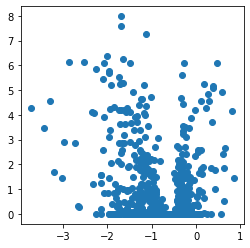

In [23]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(new_data['Log2 Corrected Abundance Ratio'], abs(new_data['LOG10 Adj.P-val']))
print(len(new_data['Log2 Corrected Abundance Ratio']))
print(len(abs(new_data['LOG10 Adj.P-val'])))


##### 2. Réaliser des versions évoluées du graphique précédent
L'objectif est de mettre l'accent sur la région **-Log10 adj Pvalue > 4** et **Log2 corrected abundance ratio > 0**.
<br/>Pour cela vous revisiterez le scatter plot précedent au travers des versions suivantes:
<br/><span style="color:firebrick;font-weight:bold"> $\rhd$ première version : un rectangle de la couleur de votre choix matérialisera la région</span>
<br/><span style="color:firebrick;font-weight:bold"> $\rhd$ deuxième version  : une couleur de votre choix représentera les points de la région</span>
<br/><span style="color:firebrick;font-weight:bold"> $\rhd$ troisème version (optionnel): Les identifiants uniprot remplaceront les points des protéines de la région</span>

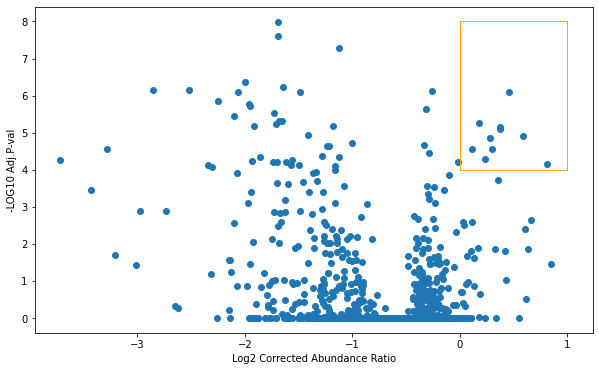

In [38]:
from matplotlib.patches import ArrowStyle
from matplotlib.patches import Rectangle

#1
fig, ax = plt.subplots(figsize=(10,6), ncols=1, nrows=1)
ax.scatter(new_data['Log2 Corrected Abundance Ratio'],new_data['LOG10 Adj.P-val'])
ax.set_xlabel("Log2 Corrected Abundance Ratio")
ax.set_ylabel("-LOG10 Adj.P-val")
ax.add_patch(Rectangle((0,4), 1,4,facecolor='none', edgecolor='orange'))



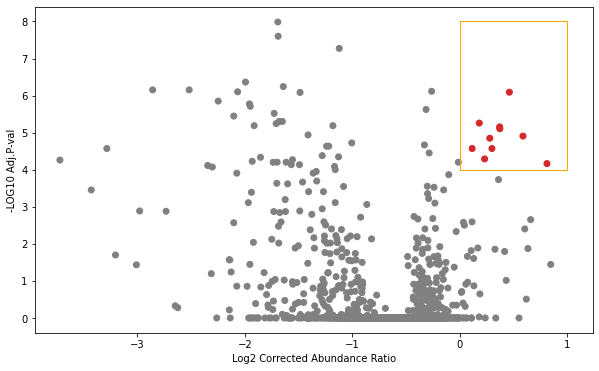

In [54]:
#2
fig2, ax2 = plt.subplots(figsize=(10,6), ncols=1, nrows=1)

ax2.set_xlabel("Log2 Corrected Abundance Ratio")
ax2.set_ylabel("-LOG10 Adj.P-val")
ax2.add_patch(Rectangle((0,4), 1,4,facecolor='none', edgecolor='orange'))
new_data['group'] = 'grey'
new_data.loc[(new_data['y'] > 4 )  & (new_data['x'] > 0.0 ),'group' ] = 'tab:red'
ax2.add_patch(Rectangle((0,4), 1,4,facecolor='none', edgecolor='orange'))
ax2.scatter(new_data['Log2 Corrected Abundance Ratio'],new_data['LOG10 Adj.P-val'], c=new_data['group'])

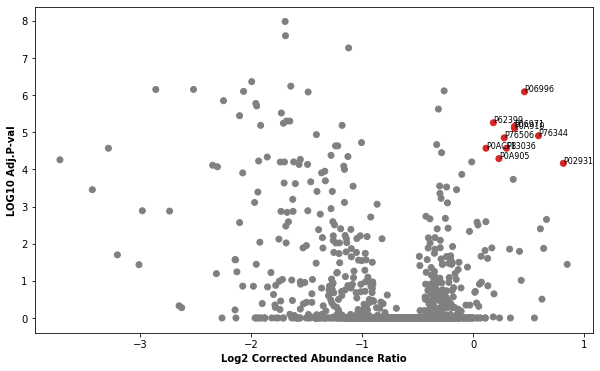

In [57]:
#3
fig3, ax3 = plt.subplots(figsize=(10,6), ncols=1, nrows=1)

new_data['group'] = 'grey'
new_data.loc[(new_data['y'] > 4 )  & (new_data['x'] > 0.0 ),'group' ] = 'tab:red'
#new_data.loc[(new_data['y'] < 4 )  & (new_data['x'] > 0.0 ),'group' ] = 'tab:blue'


ax3.scatter(new_data['Log2 Corrected Abundance Ratio'],new_data['LOG10 Adj.P-val'], c=new_data['group'])
ax3.set_xlabel('Log2 Corrected Abundance Ratio',fontweight='bold')
ax3.set_ylabel('LOG10 Adj.P-val',fontweight='bold')

texts = []
for i in range(len(data)):
  if new_data.iloc[i].y > 4 and new_data.iloc[i].x > 0 :
    texts.append(plt.text(x = new_data.iloc[i].x, y = new_data.iloc[i].y, s=new_data.iloc[i].Accession, fontsize = 8))


#### Analyse ORA

##### Principes
Vous disposez d'un objet analyser permettant de réaliser une analyse de la sur-représentation (**ORA**) en termes GO parmi une liste de protéine d'intérêt.
La fréquence des termes GO dans le protéome totale est utilisée comme référence.

L'objet analyser s'instancie ainsi
```python
from stat_utils import GO_ORA_analyser
o = GO_ORA_analyser(f"{dataDir}/go.owl", f"{dataDir}/K12_proteome", f"{dataDir}/dataset")
```

Il fournit une méthode pour chaque catégorie de termes GO
<i>{ biological_process, molecular_function, cellular_component }</i>

Une éventuelle surreprésentation des termes GO de la catégorie <i>biological_process</i> est par exemple calculée parmi les protéines P29744 et P05706 de la façon suivante:

```python
goTerm_scores = o.biological_process(["P29744", "P05706"])
```
<span style="color:green;font-weight:bold">$\uparrow$ Reproduire cet exemple dans la cellule ci-dessous.$\downarrow$ </span>
</br><span style="color:firebrick;font-weight:bold"> $\rhd$ Inspecter l'objet retourné par la méthode o.biological_process, que voyez-vous ?</span>

In [59]:
from stat_utils import GO_ORA_analyser
o = GO_ORA_analyser(f"{dataDir}/go.owl", f"{dataDir}/K12_proteome", f"{dataDir}/dataset")
#goTerm_scores = o.biological_process(["P29744", "P05706"])
#print(goTerm_scores)

Loading ontology
Loaded
Reading whole proteome
4391 Loaded
reading experimental protein set
2024 Loaded


###### 2/ Analyser la représentation des termes GO parmi les protéines surabondantes de l'experience
<span style="color:firebrick;font-weight:bold"> $\rhd$ Vous devrez extraire les identifiants uniprot des protéines aux `Log2 Corrected Abundance Ratio` supérieurs au seuil alpha de 5%.</span>
<br/><span style="color:firebrick;font-weight:bold"> $\rhd$ Vous conduirez sur cette liste de protéines une analyse de sur-représentation en termes GO à l'aide d'un objet *GO_ORA_analyser*.</span>
<br/><span style="color:firebrick;font-weight:bold"> $\rhd$ Vous pouvez faire varier le seuil d'abondance autour de la valeur alpha.</span>
<br/><span style="color:firebrick;font-weight:bold"> $\rhd$ Vous traiterez les 3 catégories *biological_process / molecular_function /cellular_component*.</span>



Familiarisez-vous avec la structures des dictionnaires de résultas, vous pouvez [les sauvegarder au format json](https://docs.python.org/3/library/json.html).


In [ ]:
# extraire les identifiants uniprot des protéines aux Log2 Corrected Abundance Ratio supérieurs au seuil alpha de 5%.
# sur cette liste de protéines une analyse de sur-représentation en termes GO à l'aide d'un objet GO_ORA_analyser.
# faire varier le seuil d'abondance autour de la valeur alpha (-0.099..-0.095..-0.091)
# 3 catégories biological_process / molecular_function /cellular_component

pv = -0.091
while pv > -0.099 :

    new_data=new_data.loc[new_data["Log2 Corrected Abundance Ratio"]> -0.095] #recuperation des id avec une abondance superieur à 5%
    
    #Analyse de "biological process"
    o = GO_ORA_analyser(f"{dataDir}/go.owl", f"{dataDir}/K12_proteome", f"{dataDir}/dataset")
    new_data_bp = o.biological_process(new_data['Accession'].values.tolist())
    print("\n")

    #Analyse de "molecular function"
    o = GO_ORA_analyser(f"{dataDir}/go.owl", f"{dataDir}/K12_proteome", f"{dataDir}/dataset")
    new_data_mf = o.molecular_function(new_data['Accession'].values.tolist())
    print("\n")

    #Analyse de "cellular component"
    o = GO_ORA_analyser(f"{dataDir}/go.owl", f"{dataDir}/K12_proteome", f"{dataDir}/dataset")
    new_data_cc = o.cellular_component(new_data['Accession'].values.tolist())
    print("\n")

    pv -= 0.001

Loading ontology
Loaded
Reading whole proteome
4391 Loaded
reading experimental protein set
2024 Loaded
Building biological process GO Tree
Extracting biological process ontology
Applying true path collapsing
389 GO terms, 105 leaves, 53 proteins
Extracting biological process ontology
Applying true path collapsing
2728 GO terms, 6650 leaves, 3128 proteins
Evaluated 388 / 388 Pathways, based on 67 proteins


Loading ontology
Loaded
Reading whole proteome
4391 Loaded
reading experimental protein set
2024 Loaded
molecular function process GO Tree
Extracting molecular function ontology
Applying true path collapsing
181 GO terms, 143 leaves, 49 proteins
Extracting molecular function ontology
Applying true path collapsing
2264 GO terms, 7807 leaves, 3118 proteins
Evaluated 180 / 180 Pathways, based on 67 proteins


Loading ontology
Loaded
Reading whole proteome
4391 Loaded
reading experimental protein set
2024 Loaded
cellular component process GO Tree
Extracting cellular component ontology
A

In [69]:
print(type(new_data_bp))
print(new_data_bp[0])
print(new_data_cc[0])
print(new_data_mf[0])

<class 'list'>
2.4384924030882882e-05
(6.8944572288325495e-19, 'cell outer membrane', 'GO:0009279', ['P0A921', 'P0ADE4', 'P02943', 'P0A940', 'P09169', 'P05825', 'P0A915', 'P39180', 'P0A905', 'P76471', 'P76506', 'P13036', 'P0A927', 'P10384', 'P06971', 'P0A910', 'P0A908', 'P75780', 'P06996', 'P06129', 'P02930', 'P0A917', 'P02931', 'P0AB40', 'P0A921', 'P09169', 'P0A921', 'P0ADE4', 'P02943', 'P05825', 'P0A937', 'P06996', 'P0A903', 'P77774', 'P0A940', 'P0A937'])
(1.1519075123216585e-06, 'porin activity', 'GO:0015288', ['P02943', 'P0A910', 'P06996', 'P06129', 'P02930', 'P02931', 'P02943', 'P0A927', 'P10384'])


In [ ]:
# Familiarisez-vous avec la structures des dictionnaires de résultas, vous pouvez les sauvegarder au format json.
  
  

## Une première application: représentation riche du résultat de l'analyse


### Mise en forme "riche" des résultats grâce au notebook

Jupyter permet d'étendre le concept de la méthode **__str__()** afin de produire du contenu HTML.
 Ainsi, tout objet impémentant une méthode **_repr_html_()** sera affiché, via son rendu HTML, dans la cellule d'un notebook.

```python
class Point():
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
    def _repr_html_(self):
        htmlString = "<table><thead><tr><td>Abscisse</td><td>Ordonnée</td><td>Cote</td></tr></thead>"
        htmlString += f"<tbody><tr><td>{self.x}</td><td>{self.y}</td><td>{self.z}</td></tr></tbody></table>"
        return htmlString
Point(2,3,4)
```
Affichera

![caption](../figs/reprhtml.png)


### Intégration des résultats à la visualisation du notebook 

En vous inspirant de la fonction ci-dessus, implémenter une classe Rich_GO_ORA dont la méthode [`_repr_html_`](https://ipython.readthedocs.io/en/stable/config/integrating.html) permettra un affichage plus lisible d'une des analyses `biological_process / molecular_function /cellular_component`

Un exemple possible est,
![caption](../figs/_repr_html_.png)

(Bonus): clicker sur le nom du terme GO envoie vers sa description.
Pour cela, afficher le nom du pathway dans une balise hyperlien pour permettre d'acceder à la page de description du terme GO. 

Les termes GO sont accessibles aux URL de la forme
`http://amigo.geneontology.org/amigo/term/GO:GO_NUMBER`.




In [ ]:
class GO():
  def __init__(self, go_list):
    self.go_list = go_list

  def _repr_html_(self):
    htmlString = "<table><thead><tr><td>p-value</td><td>Description</td><td>GO</td><td>number of id</td><td>id</td></tr></thead><tbody>"
    for line in self.go_list:
      
      htmlString += f"<tr><td>{line[0]}</td><td>{line[1]}</td><td>{line[2]}</td><td>{len(line[3])}</td><td>{line[3]}</td></tr>"
    htmlString += "</tbody></table>"
    return htmlString

GO(new_data_bp)

## Une deuxième application: volcano plot améliorés
###### PANDAS
En choisissant comme seuil la valeur `alpha` du TP précédent, veuillez extraires les identifiants uniprot des protéines sur-abondantes (rappel les valeurs d'abondance sont celles de la colonne `Log2 Corrected Abundance Ratio`).

Vous devrez avoir dans des listes distinctes:
* identifiants uniprot
* `Log2 Corrected Abundance Ratio`
* `LOG10 Adj.P-val'`

###### Représentation graphiques
* Pour la catégorie de termes GO (biological_process / molecular_function /cellular_component) de votre choix
    * Générer une grille de 4 graphiques 
    * Dans chaque graphique colorez dans une couleur différentes les protéines porteuses de 4 termes de GO que vous estimez les plus pertinents 
    * Donnez le nom de la catégorie générale à la grille
    * Donnez le nom du terme GO représenté dans chaque graphique avec une couleur de titre cohérente.
    

In [ ]:
alpha = -0.096
bp = pd.DataFrame(new_data_bp, columns=['p-value', 'description', 'go', 'list of proteines'])
new_data = new_data.loc[new_data["Log2 Corrected Abundance Ratio"]>alpha]   #  les valeurs d'abondance sont celles de la colonne Log2 Corrected Abundance Ratio

fig4, ax4 = plt.subplots(figsize=(10,10), ncols=2, nrows=2) # Générer une grille de 4 graphiques 


# GO:0051234
ax4[0][0].scatter(new_data["Log2 Corrected Abundance Ratio"], new_data["LOG10 Adj.P-val"])
ax4[0][0].set_xlabel("Log2 Corrected Abundance Ratio")
ax4[0][0].set_ylabel("-LOG10 Adj.P-val")
list_id = bp.loc[bp['go']=='GO:0051234']["list of proteines"] 
new_data_prot = new_data.loc[new_data['Accession'].isin(list_id.tolist()[0])]
ax4[0][0].scatter(new_data_prot["Log2 Corrected Abundance Ratio"], new_data_prot["LOG10 Adj.P-val"], color='red')
ax4[0][0].set_title('GO:0051234')

# GO:1901566
ax4[0][1].scatter(new_data["Log2 Corrected Abundance Ratio"], new_data["LOG10 Adj.P-val"])
ax4[0][1].set_xlabel("Log2 Corrected Abundance Ratio")
ax4[0][1].set_ylabel("-LOG10 Adj.P-val")
list_id = bp.loc[bp['go']=='GO:1901566']["list of proteines"] 
new_data_prot = new_data.loc[new_data['Accession'].isin(list_id.tolist()[0])]
ax4[0][1].scatter(new_data_prot["Log2 Corrected Abundance Ratio"], new_data_prot["LOG10 Adj.P-val"], color='orange')
ax4[0][1].set_title('GO:1901566')

# GO:0050896	
ax4[1][0].scatter(new_data["Log2 Corrected Abundance Ratio"], new_data["LOG10 Adj.P-val"])
ax4[1][0].set_xlabel("Log2 Corrected Abundance Ratio")
ax4[1][0].set_ylabel("-LOG10 Adj.P-val")
list_id = bp.loc[bp['go']=='GO:0050896']["list of proteines"] 
new_data_prot = new_data.loc[new_data['Accession'].isin(list_id.tolist()[0])]
ax4[1][0].scatter(new_data_prot["Log2 Corrected Abundance Ratio"], new_data_prot["LOG10 Adj.P-val"], color='light green')
ax4[1][0].set_title('GO:0050896')

# GO:0044260
ax4[1][1].scatter(new_data["Log2 Corrected Abundance Ratio"], new_data["LOG10 Adj.P-val"])
ax4[1][1].set_xlabel("Log2 Corrected Abundance Ratio")
ax4[1][1].set_ylabel("-LOG10 Adj.P-val")
list_id = bp.loc[bp['go']=='GO:0044260']["list of proteines"] 
new_data_prot = new_data.loc[new_data['Accession'].isin(list_id.tolist()[0])]
ax4[1][1].scatter(new_data_prot["Log2 Corrected Abundance Ratio"], new_data_prot["LOG10 Adj.P-val"], color='brown')
ax4[1][1].set_title('GO:0044260')
